# Cristina Priolo SBA 23037


# Characterization of the Dataset:

The first part of the assignment is to find the characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc. and what these Characterisation mean.

In order to analize this I need to import the dataset with the help of the libraries:

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
aps_df= pd.read_csv("aps_failure_set.csv")

Now that I have imported the dataset I start analyzing it to find the specifications to do so I need to see what are:

- the info of the dataset 
- the description of the dataset
- the number of rows and columns 
- the number of object integers and floats in the dataset

In [3]:
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [4]:
print("The data set has {} rows and {} columns".format(aps_df.shape[0], aps_df.shape[1]))
display(aps_df.describe())
display(aps_df.head())
display(aps_df.dtypes.value_counts())

The data set has 60000 rows and 171 columns


,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


object    170
int64       1
dtype: int64

<span style="color: red;">The characterizations of the Data set are:</span>  

- Size: 6000 rows and 171 columns
- Number of attributes: 171 ( due that are the number of columns and the rows are the     attributes)
- Number of Obeservations: 6000 ( due that are the number of rows and the rows are the Obsevation

# <header style="color:Darkgreen;"> Checking for duplicate: </header>

In [5]:
aps_df.duplicated().sum() 

0

The duplicate are 0

# Data Preparation/Evaluation methods and EDA:

I want to check if there are any missing values in each column of the dataset: 

In [6]:
aps_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [7]:
aps_df.isnull().sum().sum()

0

From here it looks like that none missing value are in the dataset but I want to check deeper so I will check in the column: 

In [8]:
aps_df.describe(include ="object")

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


After I check the deeper in the columns of the dataset I can identify that "ab_000 and "ad_000" have "na" in their columns so it means that they have missing values and they are categorical values and not numerical. For this reason I want to explore each column that I have spottet with "na" if there are unique to understand the scale of the data:

In [9]:
aps_df["ab_000"].unique()

array(['na', '0', '2', '4', '6', '8', '18', '10', '12', '16', '204', '24',
       '134', '90', '26', '14', '34', '52', '20', '22', '30', '36', '100',
       '48', '58', '32', '28', '44', '46', '68'], dtype=object)

Now that I checked for the missing value in the same column:

In [10]:
aps_df["ab_000"].isnull().sum()

0

I will repeat the process for the column "ad_000":

In [11]:
aps_df["ad_000"].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

In [12]:
aps_df["ad_000"].isnull().sum()

0

I will identify now the missing values: 

In [13]:
missing_values=["na"]

In [14]:
aps_df=pd.read_csv("aps_failure_set.csv", na_values=missing_values)

In [15]:
missing_values=aps_df.isnull().sum()

In [16]:
print(missing_values)

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


Now to keep going applying EDA and keep cleaning the data. To do it I will remove the columns where more than 20 % of the values are missing: 

In [17]:
aps_df=aps_df.drop(aps_df.columns[aps_df.isnull().mean()>20])

I need to fill the missing values with the median to keep cleaning my data, ( I have added an ignore warnign because I was having one when I do the median):

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
aps_df.fillna(aps_df.median(),inplace=True)


In [20]:
aps_df.describe

<bound method NDFrame.describe of       class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     0.0  0.000000e+00   126.0     0.0     0.0     0.0   
2       neg   41040     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     0.0  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     0.0  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     0.0  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     0.0  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    

# <header style="color:Darkgreen;"> Visualization: </header>

<Axes: >

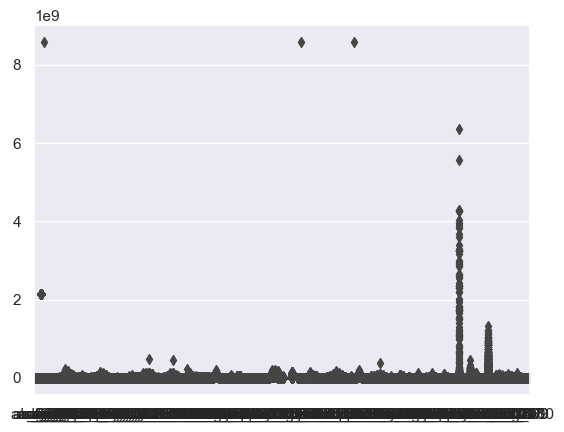

In [21]:
sns.boxplot(data=aps_df)

The line inside the box reppresent the median of the data that was extracted before in the function. This gives us the idea of the simmetry of the data and we can see that the data shift to one direction. The data needs to have a contest to have a meaning 

# PCA:

In order to keep with PCA I need to transform the Class feature into 0 so I can keep cleaning the data 

In [31]:
from sklearn.preprocessing import LabelEncoder
L_encoder = LabelEncoder()
aps_df["class"]=L_encoder.fit_transform(aps_df["class"])
aps_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Here there is not included the target variable so we need to remove because. The target variable here is "Class" that we need to drop:

In [35]:
aps_no_label = aps_df.drop(columns=["class"])

In [36]:
aps_no_label.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


To see establish how many feauters I need to retain to have the 99.5 % variance data:

In [37]:
from sklearn.decomposition import PCA

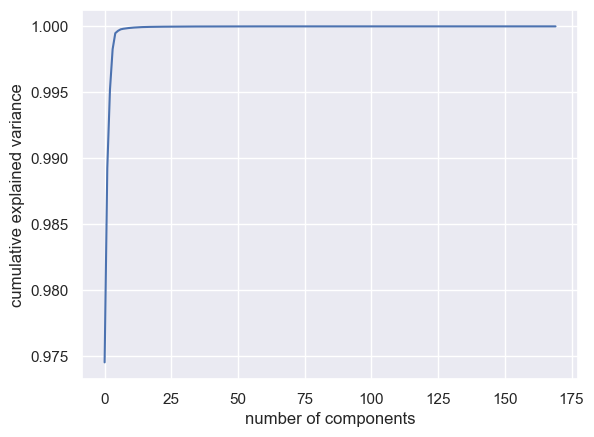

In [47]:
pca = PCA().fit(aps_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

To retain 99.5% variance data fromt the graphic I understand that I need to keep 10 features ( number from the graphic because it is beetween 0 and 25 so it looks 10 to have the asked variance)and after I can transform the data: 

In [68]:
pca = PCA(10)
projected = pca.fit_transform(aps_no_label)

In [69]:
projected.shape

(60000, 10)

In [70]:
projected

array([[ 1.79449446e+09,  3.18846158e+05, -1.42176597e+04, ...,
        -2.87195149e+05, -6.79823561e+05,  2.78514689e+06],
       [-3.36192455e+08, -5.37378138e+06, -2.83887228e+05, ...,
        -5.13368040e+05,  4.78840881e+05,  8.32975364e+04],
       [-3.36192048e+08, -5.62720424e+06, -2.76666675e+05, ...,
        -1.90548649e+05, -1.13527695e+06,  4.98287756e+05],
       ...,
       [ 1.79451386e+09, -1.43241544e+06,  2.28352902e+04, ...,
        -1.21975112e+06,  8.76327445e+05, -1.67145601e+06],
       [ 1.79444580e+09,  9.85349724e+05, -6.42205767e+04, ...,
        -1.45984685e+06, -1.36762254e+05,  1.83834333e+06],
       [-3.36275999e+08, -4.90353979e+06, -3.28667522e+05, ...,
        -1.92420159e+06, -8.52033025e+05,  1.28153052e+06]])

To see how this looks like I transform in a dataframe where I call the features: C1 and C2 so far so on to arrive to 10 features: 

In [71]:
aps_pca = pd.DataFrame(projected, columns =['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10'])

In [72]:
aps_pca["class"] = aps_df["class"]

In [73]:
aps_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,class
0,1.794494e+09,3.188462e+05,-14217.659745,3.230521e+06,1.245420e+07,5.350023e+06,-2.998451e+05,-287195.148620,-6.798236e+05,2.785147e+06,0
1,-3.361925e+08,-5.373781e+06,-283887.227983,-6.859432e+06,-1.469630e+05,2.344798e+06,-2.856636e+05,-513368.039868,4.788409e+05,8.329754e+04,0
2,-3.361920e+08,-5.627204e+06,-276666.674932,-1.032377e+07,-1.504882e+06,-1.433182e+06,7.498185e+05,-190548.649086,-1.135277e+06,4.982878e+05,0
3,-3.361691e+08,-6.271391e+06,-262922.692203,-1.485077e+07,-8.968792e+06,-7.707045e+05,1.846032e+05,-355709.310815,7.846488e+05,-1.410011e+06,0
4,-3.362450e+08,-4.904796e+06,-310152.073605,1.002012e+07,-5.244606e+06,-2.703710e+06,1.838340e+06,448503.169620,5.112239e+05,1.338657e+06,0


# <header style="color:Darkgreen;"> Curse of Dimentionality: </header>

The curse of dimentionality is when we don't have enought observation but enought features. In order to extract the patter in the data we will need to reduce the feautres to have more observations to find the path in the data itself. In order to do so we apply PCA to our dataset after the cleanign phase of EDA. In this case we have dropped the feature "Class" in order to perform PCA. To do so before we needed to transform the feature from an Object to an integer.

# Conclusions:

At the beggining we analized our dataset and we have noticed that we didn't have any missing values but we had in some columns "NA" so it means due that it is not a value this could compromise our analisis. To solve this issue we analized the unique values and we sum them up. After we dropped the columns that were having more than 20 % missing values and fill them with the mediam. After cleaning our data we were able to visualize them in order to see the pattern in the data.

After we replased in the column " class" with values in order to drop and perform PCA. 

From here we were able to perfoming PCA to see how much we need to drop to find the pattern in the datas. 

# References

1- Kallepalliravi. “Python: Finding Missing Values in a Data Frame.” Medium, 19 Aug. 2020, medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd.

2- Matplotlib. “Matplotlib: Python Plotting — Matplotlib 3.1.1 Documentation.” Matplotlib.org, 2012, matplotlib.org/.

3- Numpy. “NumPy.” Numpy.org, 2009, numpy.org/.

4- Pandas. “Python Data Analysis Library — Pandas: Python Data Analysis Library.” Pydata.org, 2018, pandas.pydata.org/.

5- scikit-learn. “Scikit-Learn: Machine Learning in Python.” Scikit-Learn.org, 2019, scikit-learn.org/stable/.

6- seaborn. “Seaborn: Statistical Data Visualization — Seaborn 0.9.0 Documentation.” Pydata.org, 2012, seaborn.pydata.org/.

7- Riederer, Yihui Xie, Christophe Dervieux, Emily. 5.1 Font Color | R Markdown Cookbook. Bookdown.org, bookdown.org/yihui/rmarkdown-cookbook/font-color.html.

8- “How to Disable Python Warnings?” Stack Overflow, stackoverflow.com/questions/14463277/how-to-disable-python-warnings. 

9- UrmishaEduWorld. “Drop Columns Where Percentage of Missing Values Is Greater than 50% in Python.” Www.youtube.com, UrmishaEduWorld, 24 May 2022, www.youtube.com/watch?v=ziv2o_POO0A. Accessed 29 Oct. 2023. 

10- “Working with Missing Data in Pandas.” GeeksforGeeks, 3 Jan. 2019, www.geeksforgeeks.org/working-with-missing-data-in-pandas/. 